In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [6]:
datasets.MNIST.resources = [
    ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz', 'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
    ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz', 'd53e105ee54ea40749a09fcbcd1e9432'),
    ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz', '9fb629c4189551a2d022fa330f9573f3'),
    ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz', 'ec29112dd5afa0611ce80d1b7f02629c')
]

In [7]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

































9920512it [00:04, 2303685.05it/s]                             


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw




32768it [00:00, 133387.05it/s]           


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw










1654784it [00:00, 2021433.63it/s]                             


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw




8192it [00:00, 40252.13it/s]            
d:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw
Processing...
Done!


In [9]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [10]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(
        train_data,
        batch_size=100,
        shuffle=True,
        num_workers=1
    ),

    'test': DataLoader(
        test_data,
        batch_size=100,
        shuffle=True,
        num_workers=1
    )
}

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [12]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%\n)")


In [13]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\hyder\AppData\Local\Temp/ipykernel_4768/4106072696.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.302976
Train Epoch: 1 [2000/60000 (3%)]	2.295396
Train Epoch: 1 [4000/60000 (7%)]	2.147732
Train Epoch: 1 [6000/60000 (10%)]	2.003941
Train Epoch: 1 [8000/60000 (13%)]	1.893858
Train Epoch: 1 [10000/60000 (17%)]	1.840765
Train Epoch: 1 [12000/60000 (20%)]	1.836111
Train Epoch: 1 [14000/60000 (23%)]	1.852949
Train Epoch: 1 [16000/60000 (27%)]	1.826398
Train Epoch: 1 [18000/60000 (30%)]	1.708540
Train Epoch: 1 [20000/60000 (33%)]	1.673939
Train Epoch: 1 [22000/60000 (37%)]	1.711320
Train Epoch: 1 [24000/60000 (40%)]	1.688396
Train Epoch: 1 [26000/60000 (43%)]	1.632332
Train Epoch: 1 [28000/60000 (47%)]	1.638896
Train Epoch: 1 [30000/60000 (50%)]	1.701706
Train Epoch: 1 [32000/60000 (53%)]	1.685804
Train Epoch: 1 [34000/60000 (57%)]	1.657664
Train Epoch: 1 [36000/60000 (60%)]	1.642882
Train Epoch: 1 [38000/60000 (63%)]	1.596866
Train Epoch: 1 [40000/60000 (67%)]	1.648788
Train Epoch: 1 [42000/60000 (70%)]	1.616474
Train Epoch: 1 [44000/60000 (73%)]	1.615067

Prediction: 7


C:\Users\hyder\AppData\Local\Temp/ipykernel_4768/4106072696.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


<function matplotlib.pyplot.show(close=None, block=None)>

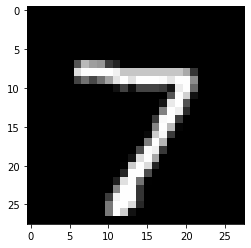

In [16]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')

plt.show